In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [12]:
activity =[]
basket_amount =[]
bonus_credit_eligibility =[]
gender = []
num_borrowers = []
has_picture = []
description_lang = []
description = []
funded_amount = []
funded_date =[]
bulkEntries = []
entries = []
lender_count= []
country_code =[]
town = []
geo_level =[]
partner_id = []
sector =[]
status= []
tags = []
len_teg=[]
video = []
repayment_term= []
repayment_interval =[]
use = []
theme= []
lat =[]
lit = []



In [14]:
for i in range(1, 1638):
    with open("/home/patanjalichanakya/Documents/Galvanize/project/loans/%s.json" %i) as f:
        file_ = f.read()
    file_json = json.loads(file_)["loans"]
    for j in range(len(file_json)):
        repayment_interval.append(file_json[j]["terms"]["repayment_interval"])
        repayment_term.append(file_json[j]["terms"]["repayment_term"])
        activity.append(file_json[j]["activity"])
        basket_amount.append(file_json[j]["basket_amount"])
        bonus_credit_eligibility.append(file_json[j]["bonus_credit_eligibility"])
        num_borrowers.append(len(file_json[j]["borrowers"]))
        gender.append([str(x["gender"]) for x in file_json[j]["borrowers"]])
        has_picture.append([x["pictured"] for x in file_json[j]["borrowers"]])
        description_lang.append(len(file_json[j]["description"]["languages"]))
        description.append( file_json[j]["description"]["texts"]["en"]\
                           if 'en' in file_json[j]["description"]['languages'] else None)
        funded_amount.append( file_json[j]["funded_amount"])
        funded_date.append(str(file_json[j]["funded_date"]))
        bulkEntries.append(file_json[j]["journal_totals"]["bulkEntries"])
        entries.append(file_json[j]["journal_totals"]["entries"])
        lender_count.append(file_json[j]["lender_count"])
        country_code.append(file_json[j]["location"]["country_code"])
        geo_level.append(file_json[j]["location"]["geo"]["level"])
        town.append(file_json[j]["location"]["town"])
        partner_id.append(file_json[j]["partner_id"])
        sector.append(file_json[j]["sector"])
        status.append(file_json[j]["status"])
        tags.append(file_json[j]["tags"])
        len_teg.append(len(file_json[j]["tags"]))
        video.append(file_json[j]["video"])
        use.append(file_json[j]["use"])
        theme.append(file_json[j]["theme"])
        lat.append([float(i) for i in str(file_json[j]["location"]["geo"]["pairs"]).split()][0])
        lit.append([float(i) for i in str(file_json[j]["location"]["geo"]["pairs"]).split()][1])

In [45]:
dict_={"activity":activity, "basket_amount":basket_amount, "bonus_credit_eligibility":bonus_credit_eligibility,\
"gender":gender, "num_borrowers":num_borrowers,"has_picture":has_picture, "description_lang":description_lang,\
"description":description, "funded_amount":funded_amount, "funded_date":funded_date, "bulkEntries":bulkEntries,\
"entries":entries, "lender_count":lender_count, "country_code":country_code, "town":town, "geo_level":geo_level,\
"partner_id":partner_id, "sector":sector, "status":status, "tags":tags, "len_teg":len_teg, "video":video,\
"repayment_term":repayment_term, "repayment_interval":repayment_interval, "use":use, "theme":theme, "lat":lat}#, "lit": lit}

In [46]:
print len(lat)
x =pd.DataFrame(dict_)

818139


In [47]:
# z = ['activity', 'basket_amount', 'bonus_credit_eligibility',\
#        'bulkEntries', 'country_code', 'description', 'description_lang',\
#        'entries', 'funded_amount', 'funded_date', 'geo_level',\
#        'len_teg', 'lender_count', 'num_borrowers',\
#        'partner_id', 'repayment_interval', 'repayment_term', 'sector',\
#        'status', 'theme', 'town', 'use']
# for i in z:
#     print i, len(x[i].unique())

x.head()

,activity,basket_amount,bonus_credit_eligibility,bulkEntries,country_code,description,description_lang,entries,funded_amount,funded_date,...,partner_id,repayment_interval,repayment_term,sector,status,tags,theme,town,use,video
0,Butcher Shop,NaN,False,0,UG,<i>The following description was written by Mo...,1,17,500,2005-03-31T06:27:55Z,...,1,None,6,Food,paid,[],None,Tororo,"Buy bulls, open a butcher shop",None
1,Butcher Shop,NaN,False,0,UG,<i>The following description was written by Mo...,1,17,500,2005-03-31T06:27:55Z,...,1,None,6,Food,paid,[],None,Tororo,"Buy bulls, open a butcher shop",None
2,Food Production/Sales,NaN,False,0,UG,<i>The following description was written by Mo...,1,16,500,2005-03-31T06:27:55Z,...,1,None,6,Food,paid,[],None,Tororo,Buying more produce each time for greater profit,None
3,Animal Sales,NaN,False,0,UG,<i>The following description was written by Mo...,1,15,500,2005-03-31T06:27:55Z,...,1,None,6,Agriculture,paid,[],None,Tororo,Increase number of goats bought and sold each ...,None
4,Clothing Sales,NaN,False,0,UG,Eunice received 100 dollar grant from Village ...,1,12,300,2005-03-31T06:27:55Z,...,1,None,6,Clothing,paid,[],None,Tororo,Buy used clothing (mutumbe) of higher quality ...,None


In [100]:
activity_dict= {}
for i,j in enumerate(x.activity.unique()):
    activity_dict[j] = i
def change_activity(x):
    if x in activity_dict:
        return activity_dict[x]
    else:
        return -2
x.activity = x.activity.apply(lambda x: change_activity(x))

In [101]:
basket_amount_dict = {}
for i, j in enumerate(x.basket_amount.unique()):
    basket_amount_dict[j] = i
    
basket_amount_dict[basket_amount_dict.keys()[0]] =-2
def change_basket_amount(x):
    if np.isnan(x):
        return -2
    else:
        return basket_amount_dict[x]
x.basket_amount = x.basket_amount.apply(lambda x: change_basket_amount(x))

In [102]:
del x["bulkEntries"]

In [103]:
country_code_dict={}
for i, j in enumerate(x.country_code.unique()):
    country_code_dict[j] = i
    
def change_country_code(x):
    if x in country_code_dict:
        return country_code_dict[x]
    else:
        return -2
x.country_code = x.country_code.apply(lambda x : change_country_code(x))

In [104]:
gender_dict = {}
def find_male(x):
    temp_m = 0
    for j in range(len(x)):
        if x[j] == "M":
            temp_m +=1
    return temp_m
def find_female(x):
    temp_f = 0
    for j in range(len(x)):
        if x[j] == "F":
            temp_f +=1
    return temp_f

x["num_male"] = x.gender.apply(lambda x: find_male(x))
x["num_female"] = x.gender.apply(lambda x: find_female(x))
x["male_ratio"] = x.num_male/x.num_borrowers

In [105]:
status_dict = {}
for i, j in enumerate(x.status.unique()):
    status_dict[j] =i
    
x["status"] = x.status.apply(lambda x: status_dict[x]) 
x["total_loan"] = x.status.apply(lambda x: 1)

In [106]:
def change_status_paid(x):
    if x=='paid':
        return 1
    else:
        return 0
    
def  change_status_default(x):
    if x== "defaulted":
        return 1
    else:
        return 0

x["paid"] = x.status.apply(lambda x: change_status_paid(x))

x["defaulted"] = x.status.apply(lambda x: change_status_default(x))

In [107]:
x_group = x.groupby(country_code).sum()[["paid","defaulted"]]
x_group["ratio"] = x_group.defaulted/(x_group.paid+x_group.defaulted+1)
low = 0
high = 0
for i in x_group.ratio:
    if i <0.10:
        low+=1
    else:
        high+=1
print low, high, low/float(high+low)


90 0 1.0


In [34]:
x_group = x.groupby(bonus_credit_eligibility).sum()[["paid","defaulted"]]
x_group["ratio"] = x_group.defaulted/(x_group.paid+x_group.defaulted+1)

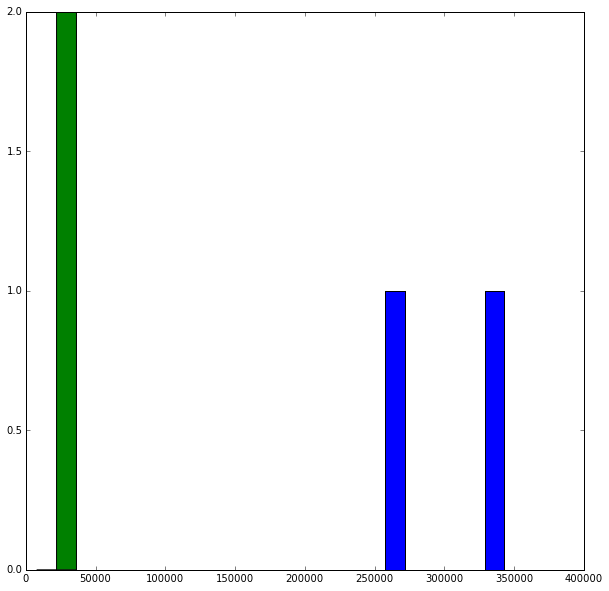

In [42]:
plt.figure(figsize=(10,10))
plt.hist([x_group["paid"], x_group["defaulted"]] , 10)
plt.legend()

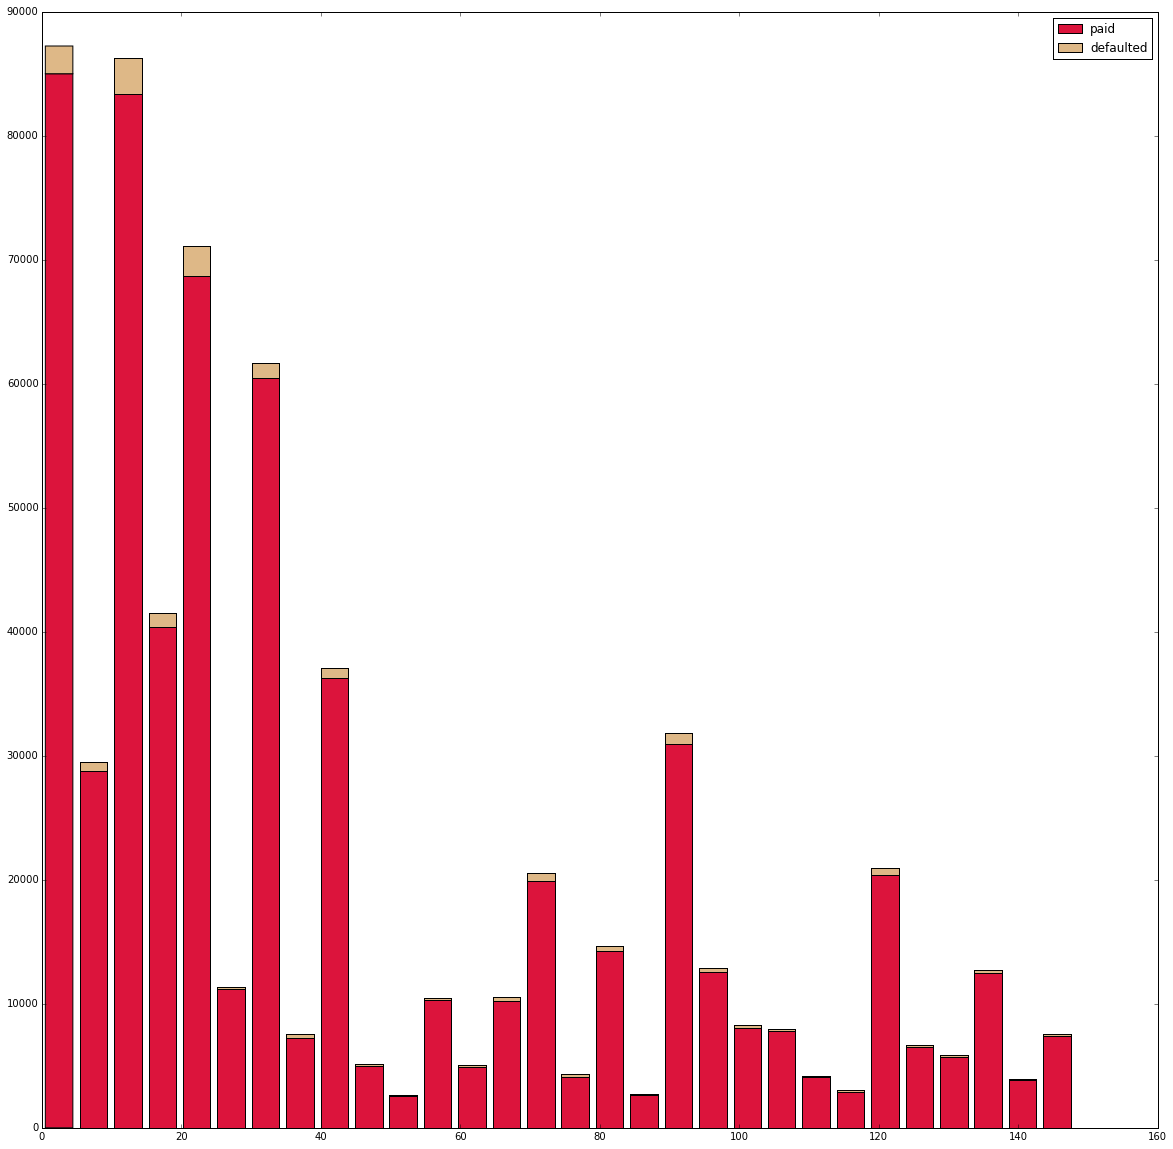

In [292]:
plt.figure(figsize=(20,20))
plt.hist([x[x.status == "paid"]["activity"],x[x.status == "defaulted"]["activity"]] , 30, histtype='bar',
                            color=['crimson', 'burlywood'],
                            label=['paid', 'defaulted'], stacked=True)
P.legend()

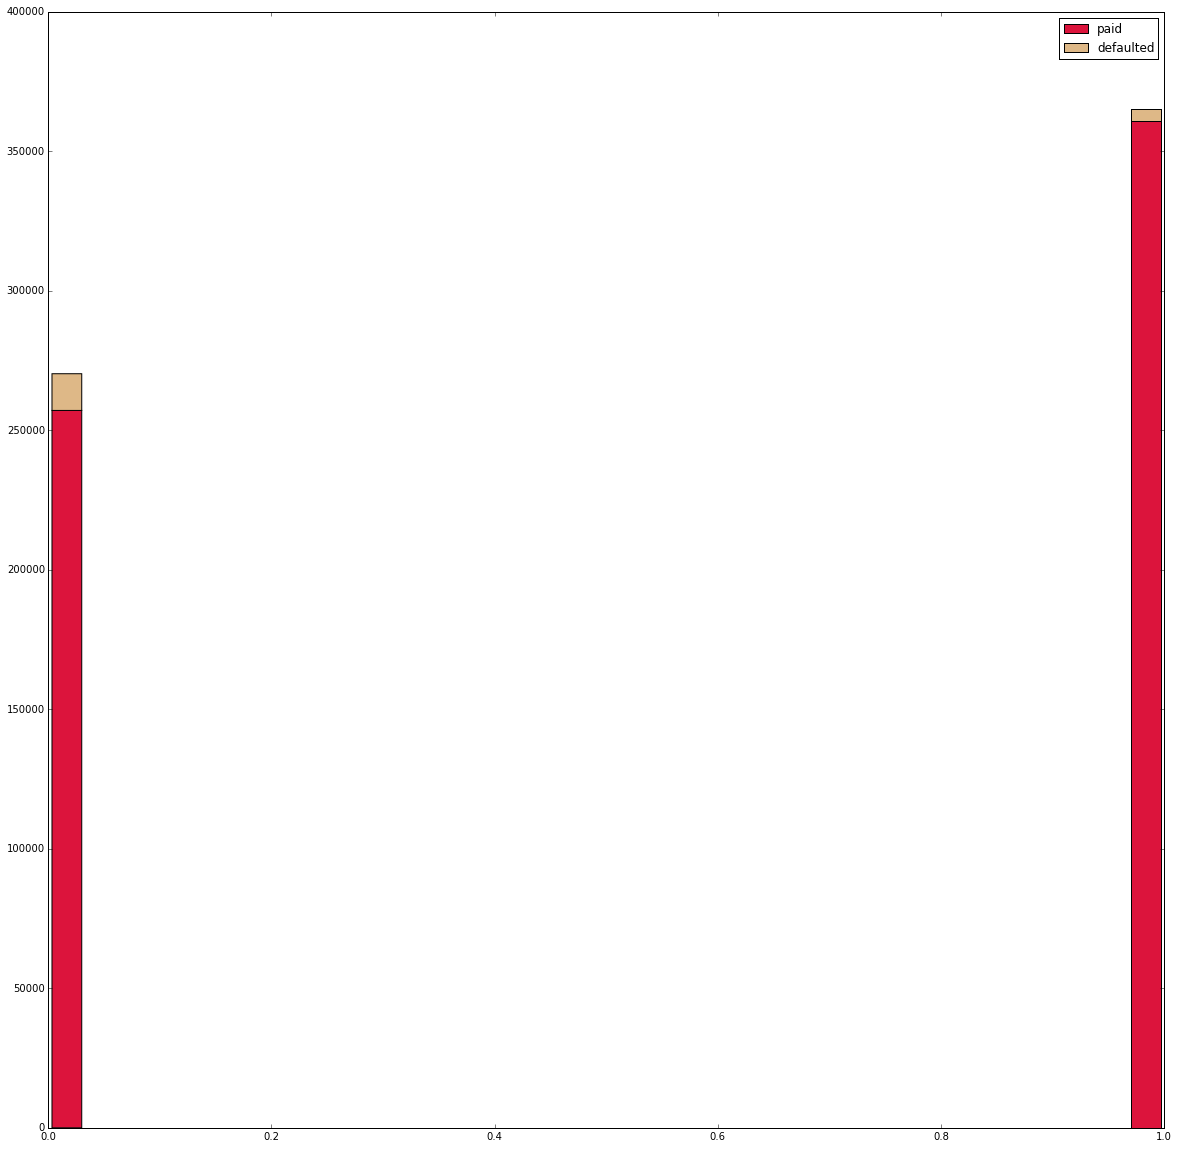

In [44]:
plt.figure(figsize=(20,20))
plt.hist([x[x.status == "paid"]["bonus_credit_eligibility"],x[x.status == "defaulted"]["bonus_credit_eligibility"]] , 30, histtype='bar',
                            color=['crimson', 'burlywood'],
                            label=['paid', 'defaulted'], stacked=True)
plt.legend()

NameError: name 'P' is not defined

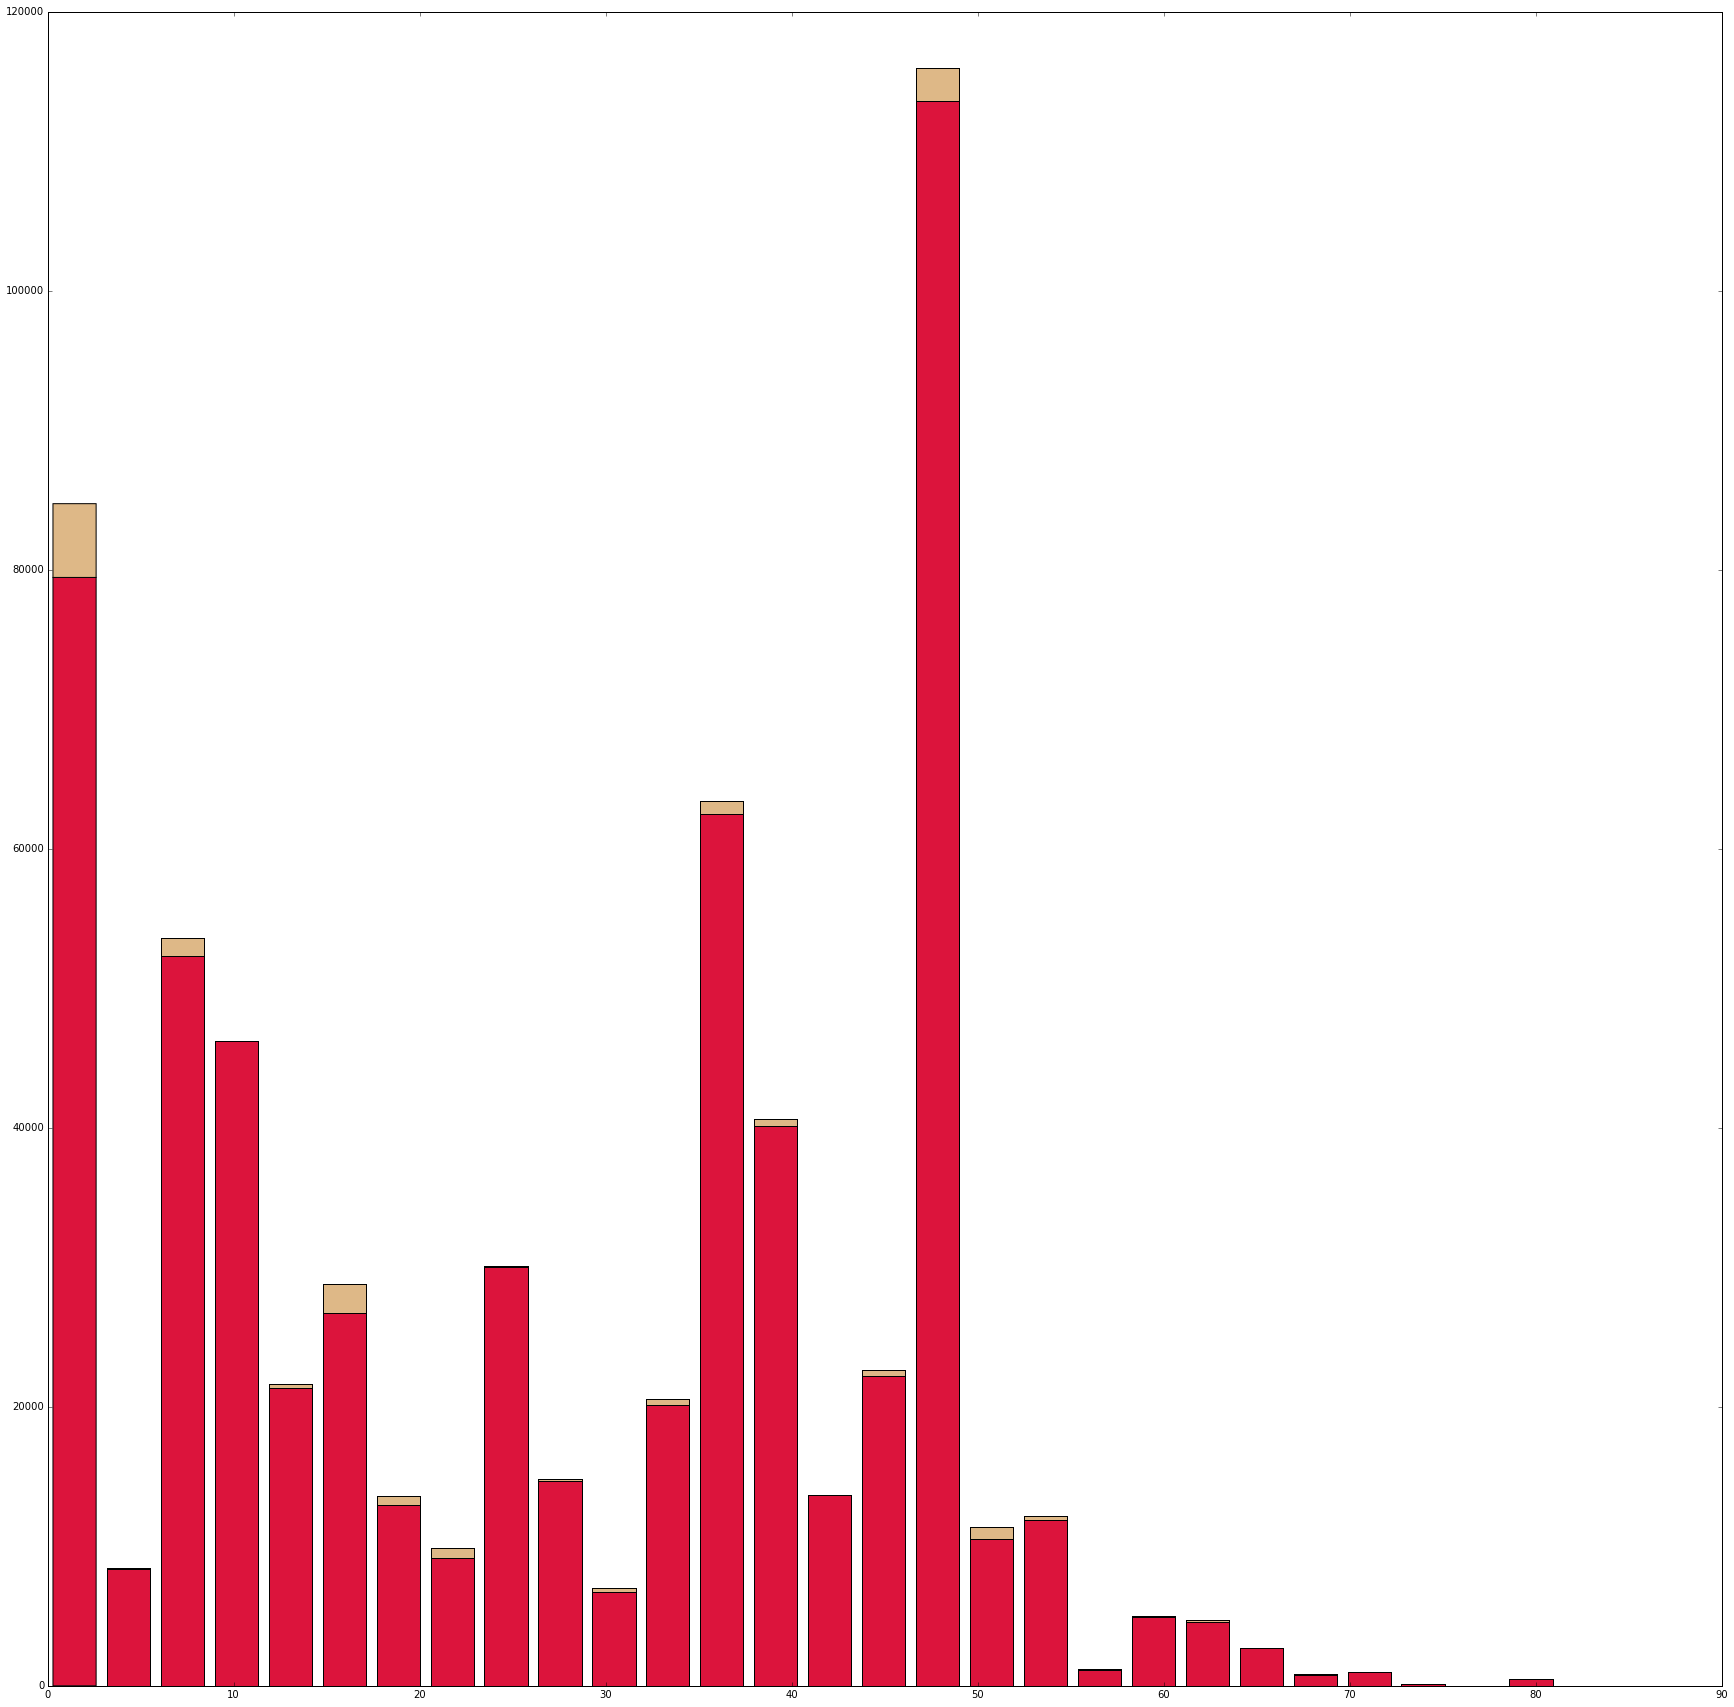

In [45]:
plt.figure(figsize=(30,30))
plt.hist([x[x.status == "paid"]["country_code"],x[x.status == "defaulted"]["country_code"]] , 30, histtype='bar',
                            color=['crimson', 'burlywood'],
                            label=['paid', 'defaulted'], stacked=True)
P.legend()

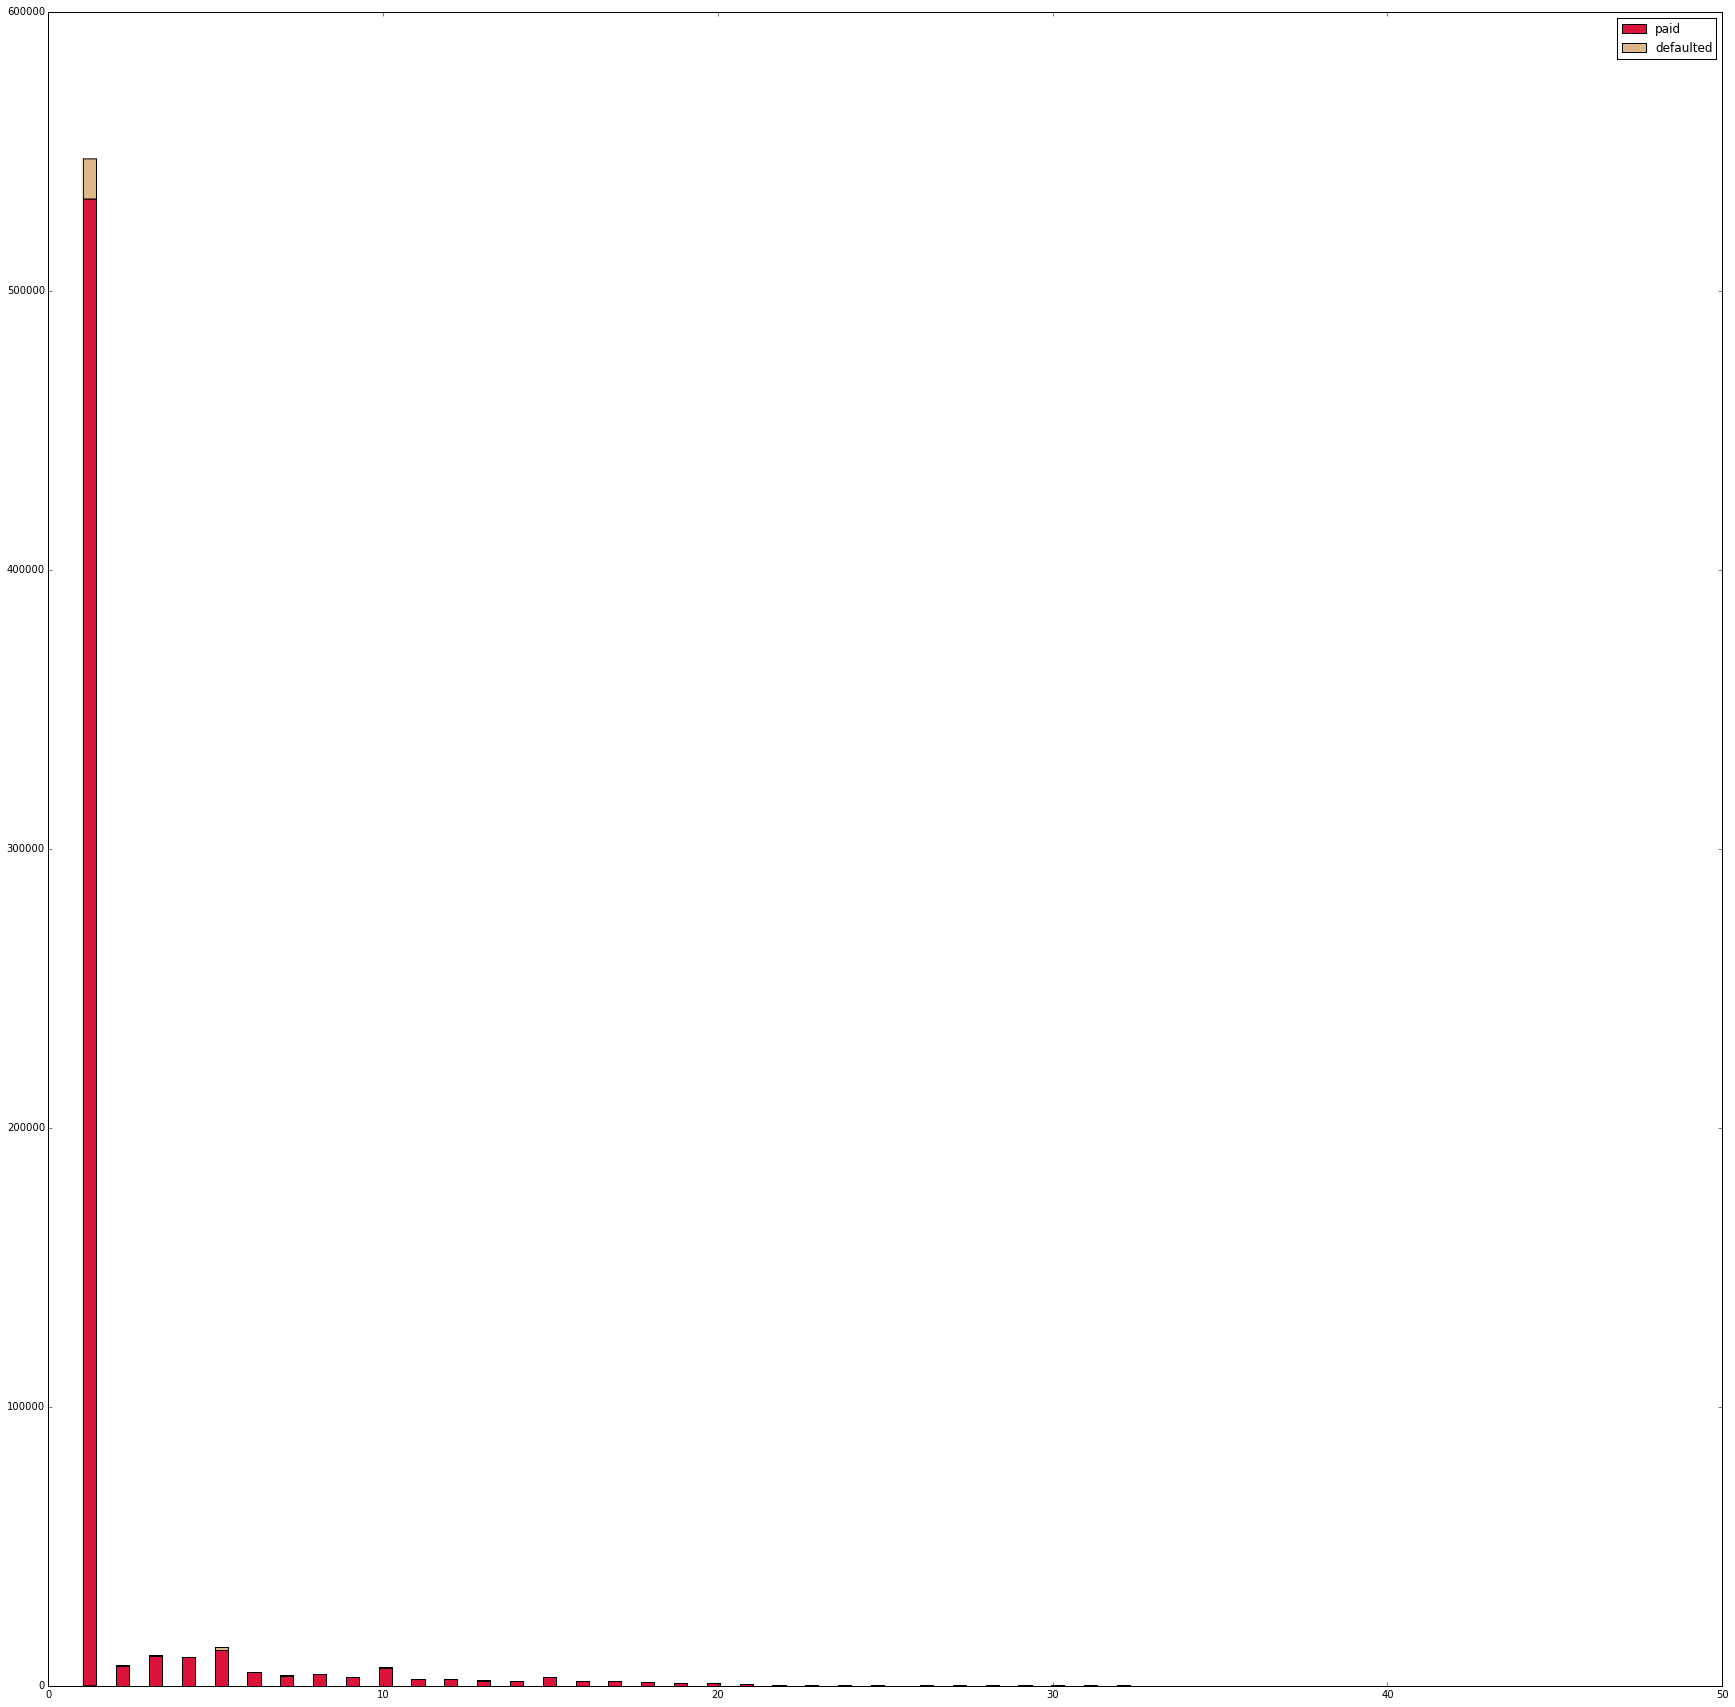

In [50]:
plt.figure(figsize=(30,30))
plt.figure(figsize=(30,30))
n, bins, patches = plt.hist([x[x.status == "paid"]["num_borrowers"],x[x.status == "defaulted"]["num_borrowers"]] , 100, histtype='bar',
                            color=['crimson', 'burlywood'],
                            label=['paid', 'defaulted'], stacked=True)
plt.legend()

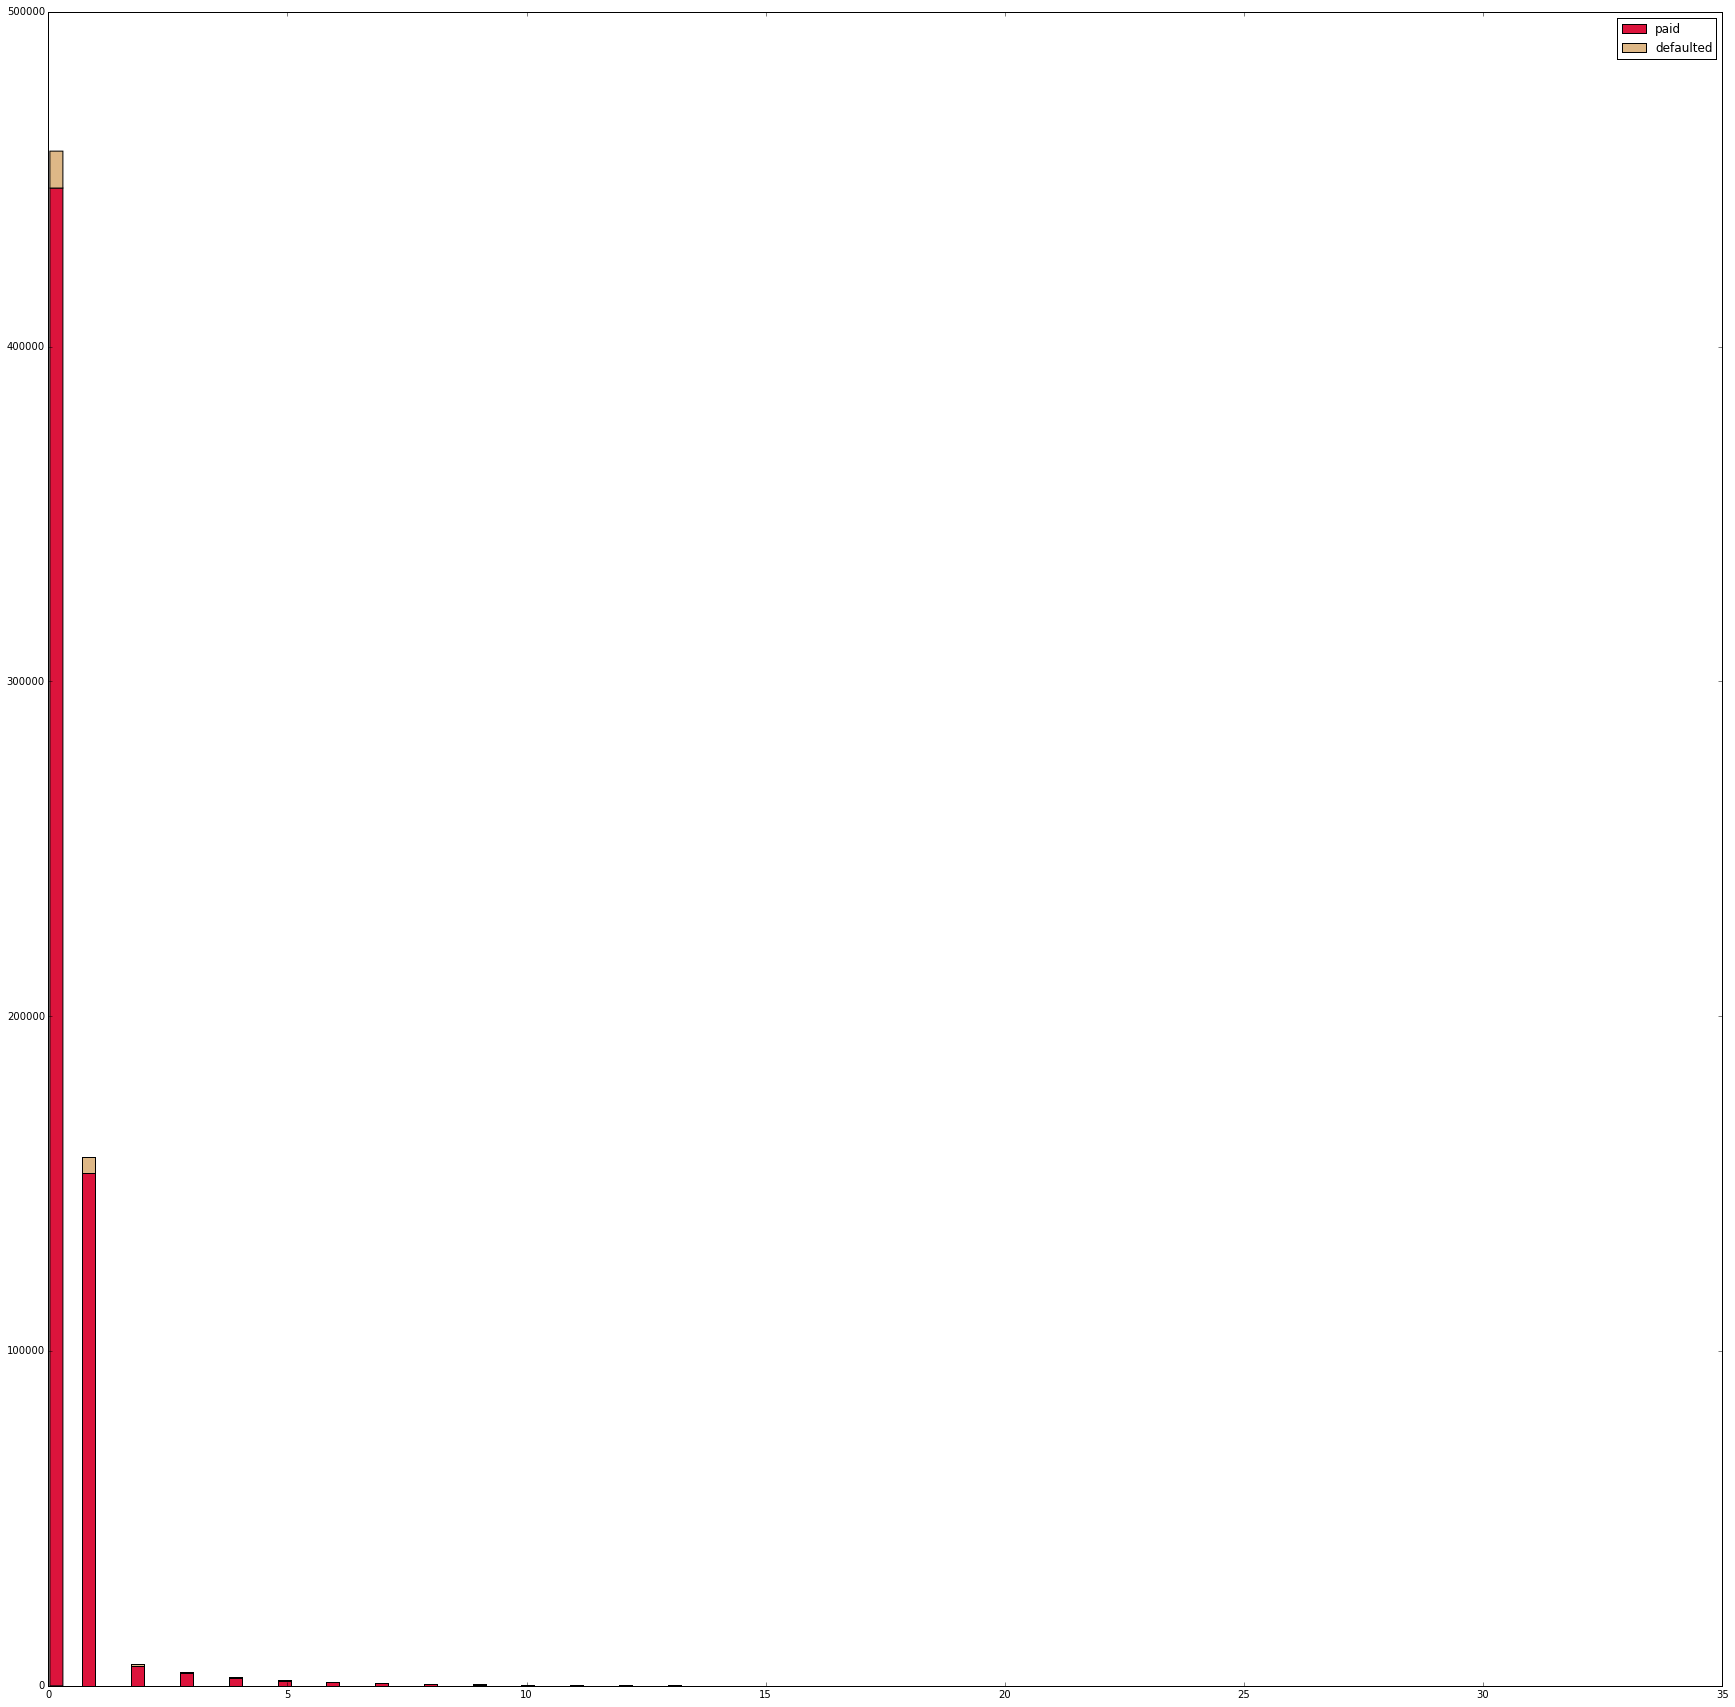

In [51]:
plt.figure(figsize=(30,30))
n, bins, patches = plt.hist([x[x.status == "paid"]["num_male"],x[x.status == "defaulted"]["num_male"]] , 100, histtype='bar',
                            color=['crimson', 'burlywood'],
                            label=['paid', 'defaulted'], stacked=True)
plt.legend()

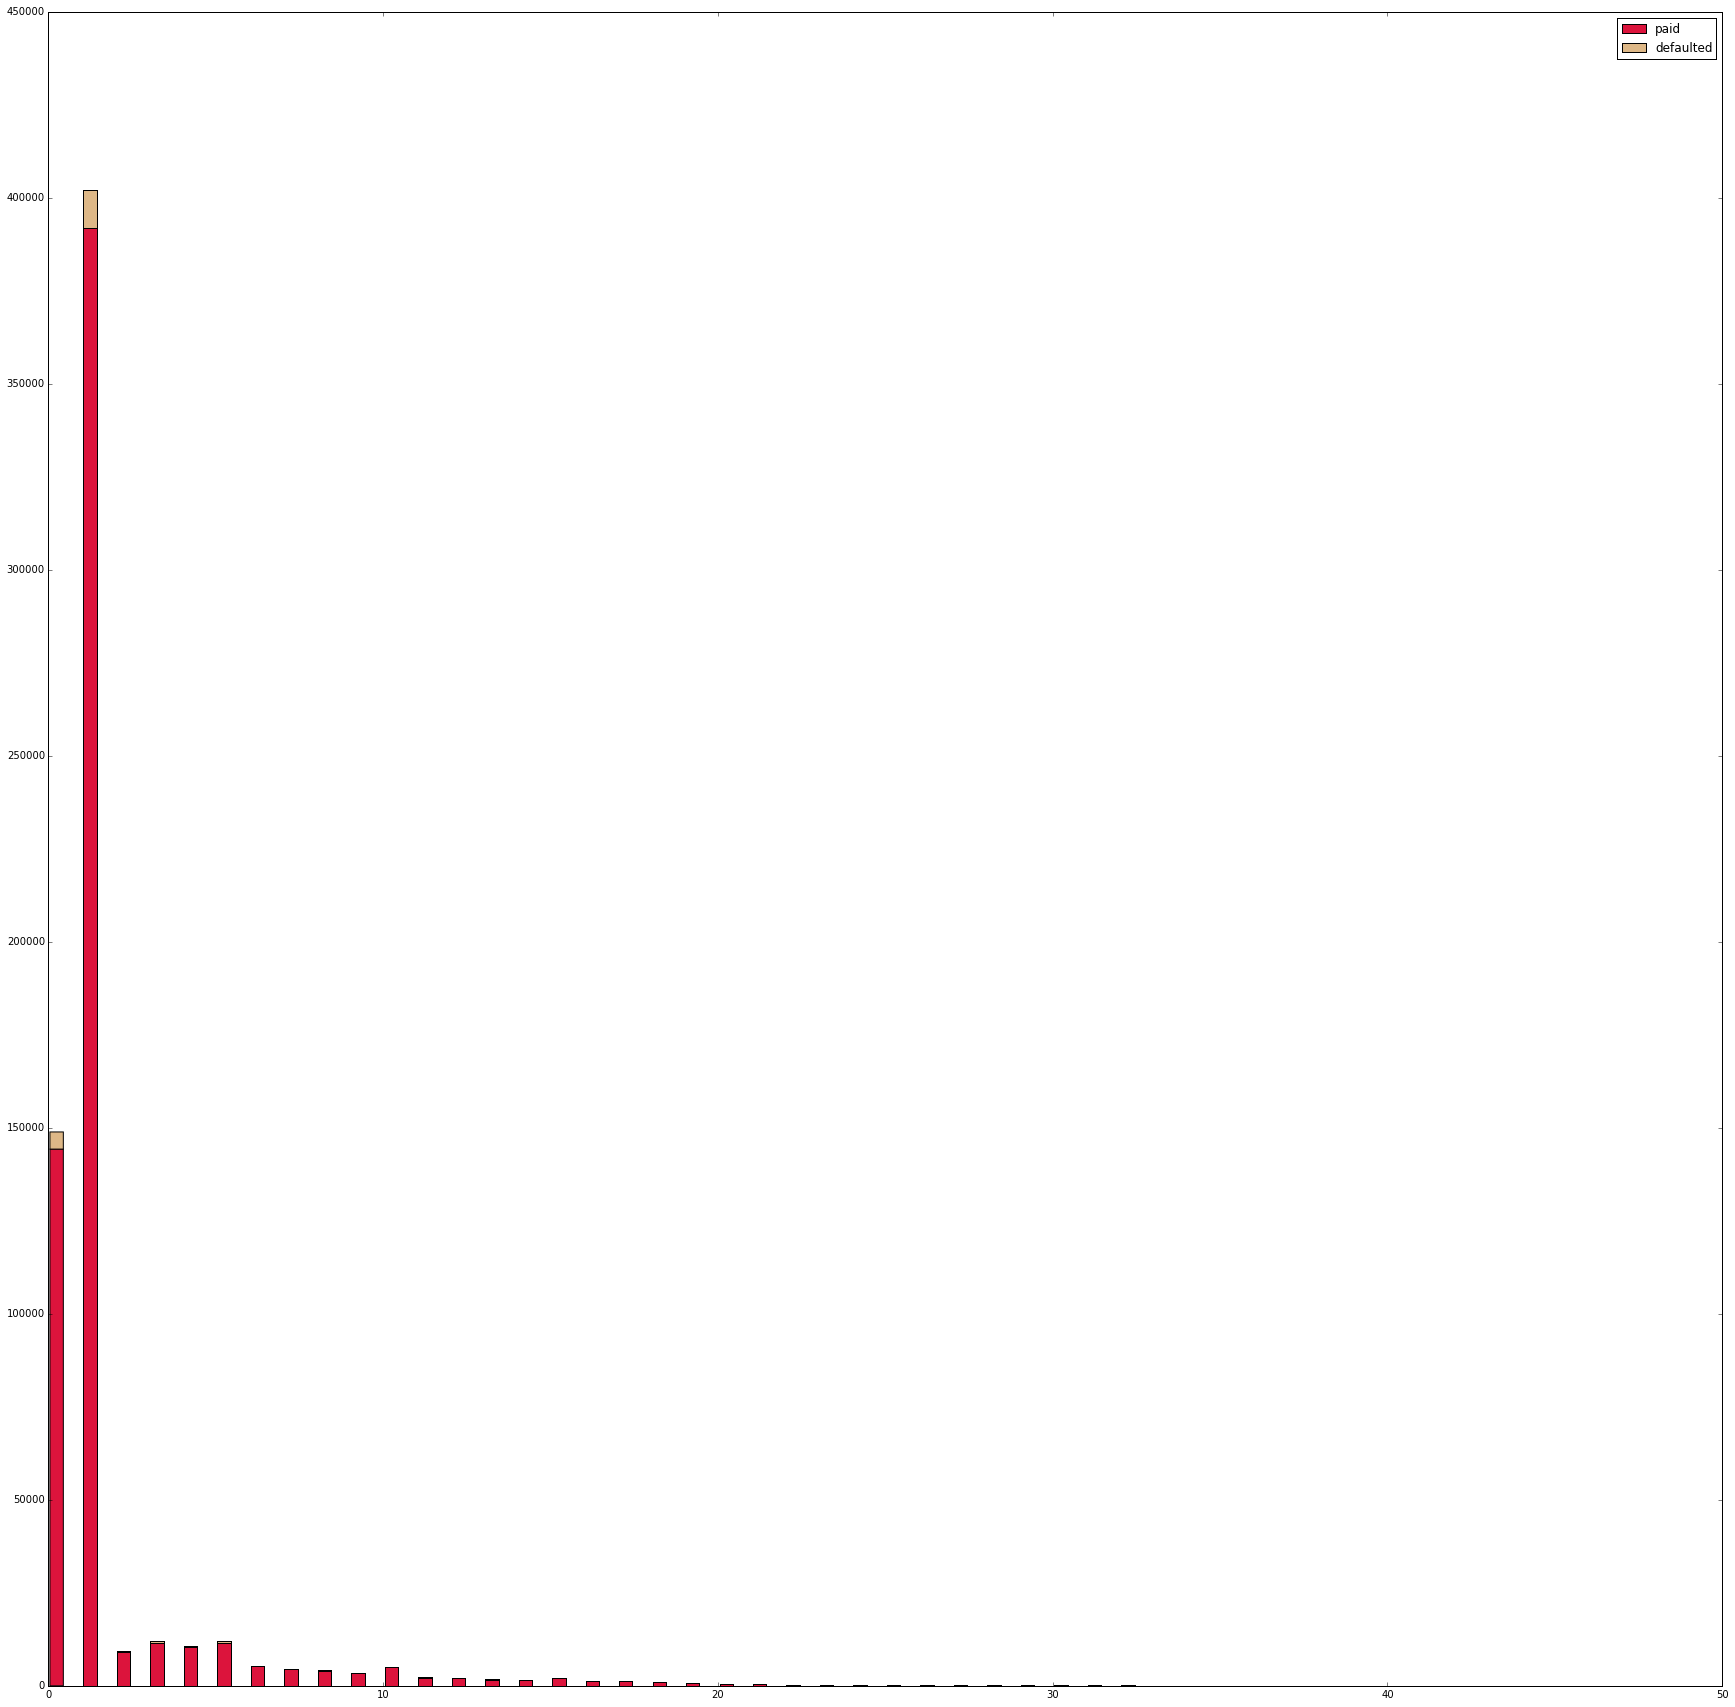

In [55]:
plt.figure(figsize=(30,30))
n, bins, patches = plt.hist([x[x.status == "paid"]["num_female"],x[x.status == "defaulted"]["num_female"]] , 100, histtype='bar',
                            color=['crimson', 'burlywood'],
                            label=['paid', 'defaulted'], stacked=True)
plt.legend()

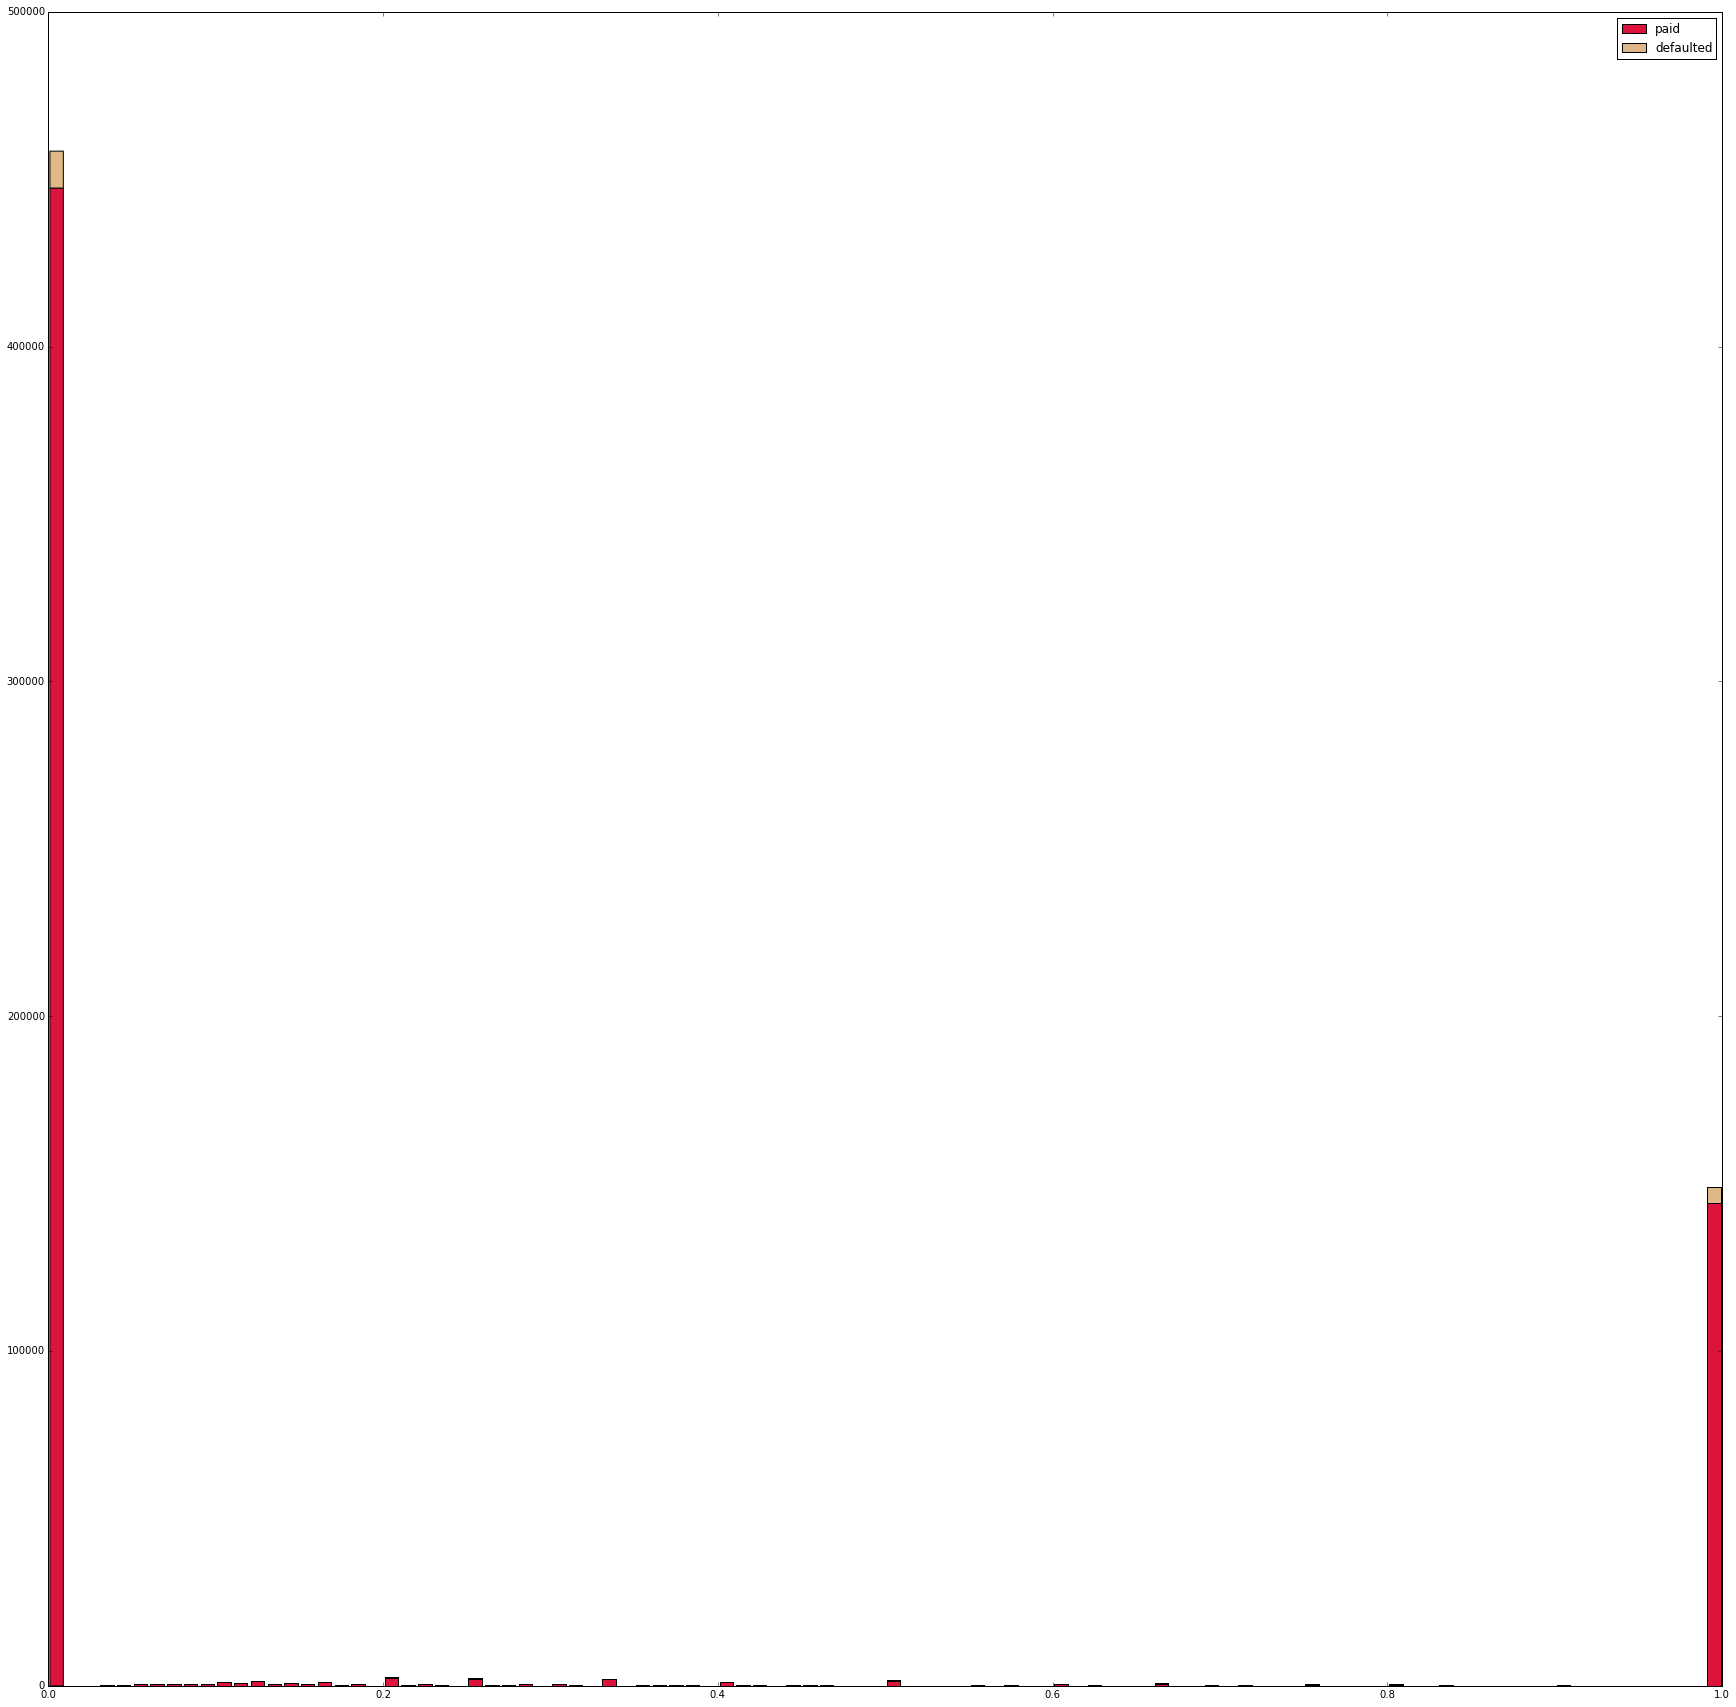

In [56]:
plt.figure(figsize=(30,30))
n, bins, patches = plt.hist([x[x.status == "paid"]["male_ratio"],x[x.status == "defaulted"]["male_ratio"]] , 100, histtype='bar',
                            color=['crimson', 'burlywood'],
                            label=['paid', 'defaulted'], stacked=True)
plt.legend()

In [82]:
z = x[condition_1|condition_2]["activity"]
z1 = x[condition_1|condition_2]["entries"]
plt.figure(figsize=(30,30))
plt.scatter(z, z1, c= x[condition_1|condition_2]["status"], alpha =0.1, cmap=Qualitative)

NameError: name 'Qualitative' is not defined

In [108]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.cross_validation import train_test_split

In [109]:
X_new = x[condition_1 | condition_2]
rfModel = RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=10, verbose=1)
y = X_new.status
X = X_new[["activity","bonus_credit_eligibility", "country_code", "description_lang", "entries", "funded_amount", "len_teg", "lender_count", "num_borrowers", "male_ratio"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =20)

In [110]:
rfModel.fit(X_train, y_train)

[Parallel(n_jobs=8)]: Done   1 out of   8 | elapsed:    4.2s remaining:   29.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    4.2s finished


RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=10, verbose=1)

In [111]:
y_predict_test = rfModel.predict(X_test)

[Parallel(n_jobs=8)]: Done   1 out of   8 | elapsed:    0.1s remaining:    1.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s finished


In [112]:
confusion_matrix(y_test, y_predict_test)

array([[184450,    968],
       [  3061,   2135]])

In [113]:
precision_score(y_test, y_predict_test)

0.68804382855301316

In [114]:
recall_score(y_test,y_predict_test).4108929946112394

0.4108929946112394

In [115]:
accuracy_score(y_test,y_predict_test)

0.97886304258868706

In [2]:
with open("/home/patanjalichanakya/Documents/Galvanize/project/loans/1.json" ) as f:
        file_ = f.read()
file_json = json.loads(file_)["loans"]

In [11]:
file_json[0]

[0.75, 34.083333]

(array([ 0.00309003,  0.00413567,  0.01436747,  0.0194244 ,  0.01657789,
         0.04694521,  0.00229477,  0.0076654 ,  0.00723541,  0.00326376]),
 array([-30., -22., -14.,  -6.,   2.,  10.,  18.,  26.,  34.,  42.,  50.]),
 <a list of 10 Patch objects>)

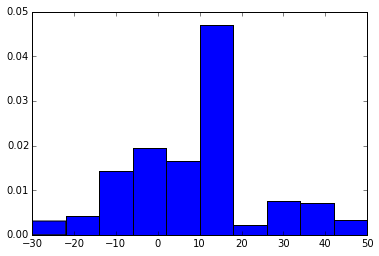

In [52]:
plt.hist(x.lat[x.status=="paid"], normed=True)

In [ ]:

plt.hist(x.lat[x.status=="defaulted"], normed=True)

In [3]:
import os.path
os.path.isfile("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/1638.csv") 

True

In [1]:
from data_cleaning import OpenFile

In [4]:
open_ = OpenFile()

In [6]:
z = open_.openfile()

In [9]:
z2 = list(z.lat)

In [12]:
for i in range(len(z2)):
    print i
    break

0
